## Data Pre Processing

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Read the dataset
file_path = r"C:\Users\akash\Desktop\ssssss.csv"
data = pd.read_csv(file_path)

# Copy the data to avoid changing the original dataset
cleaned_data = data.copy()

# Drop rows with missing values (if any)
cleaned_data.dropna(inplace=True)

# Encode categorical variables (if any)
label_encoders = {}
for column in cleaned_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    cleaned_data[column] = le.fit_transform(cleaned_data[column])
    label_encoders[column] = le

# Standardize numerical features
scaler = StandardScaler()
numerical_columns = cleaned_data.select_dtypes(include=[np.number]).columns
cleaned_data[numerical_columns] = scaler.fit_transform(cleaned_data[numerical_columns])

# Split the data into features and target variable
X = cleaned_data.drop("gdp", axis=1)
y = cleaned_data["gdp"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The cleaned data and the split sets are ready for modeling
cleaned_data.head()


,region,pden,wden,urb,fee,sor,s_landfill,gdp
0,-0.907478,-0.435142,-0.223667,-0.786141,-2.512078,-0.372652,-0.206201,0.070519
1,-0.907478,-0.354821,-0.358065,0.881878,-2.512078,0.532218,-0.206201,-0.220329
2,-0.907478,-0.351642,-0.328052,0.881878,-2.512078,0.678275,-0.206201,0.066725
3,-0.907478,-0.429013,-0.430382,0.881878,-2.512078,0.701096,-0.206201,-0.264056
4,0.525450,-0.106521,-0.001946,-0.786141,0.398077,-1.400186,1.207857,0.029611


## Linear Regression

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the cleaned dataset
file_path = r"C:\Users\akash\Downloads\cleaned_dataset.csv"
cleaned_data = pd.read_csv(file_path)

# Split the data into features and target variable
X = cleaned_data.drop("gdp", axis=1)
y = cleaned_data["gdp"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.7497141056913811, 0.23302143797110475)

## Cross Validation

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the cleaned dataset
file_path = r"C:\Users\akash\Downloads\cleaned_dataset.csv"
cleaned_data = pd.read_csv(file_path)

# Split the data into features and target variable
X = cleaned_data.drop("gdp", axis=1)
y = cleaned_data["gdp"]

# Initialize the linear regression model
model = LinearRegression()

# Perform cross-validation with 5 folds
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = np.mean(cross_val_scores)
std_score = np.std(cross_val_scores)

cross_val_scores, mean_score, std_score


(array([-0.1034059 , -0.22881324,  0.19639409,  0.16877025, -0.56941614]),
 -0.10729419001555618,
 0.281700850075003)

## Linear regression on multiple variables

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
file_path = r"C:\Users\akash\Downloads\cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Split data into features and target
X = data.drop("gdp", axis=1)
y = data["gdp"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.7497141056913811
R-squared: 0.23302143797110475


## Logistic Regression

Accuracy: 0.7420986093552465

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       581
           1       0.54      0.21      0.30       208
           2       0.00      0.00      0.00         2

    accuracy                           0.74       791
   macro avg       0.43      0.38      0.38       791
weighted avg       0.70      0.74      0.70       791



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

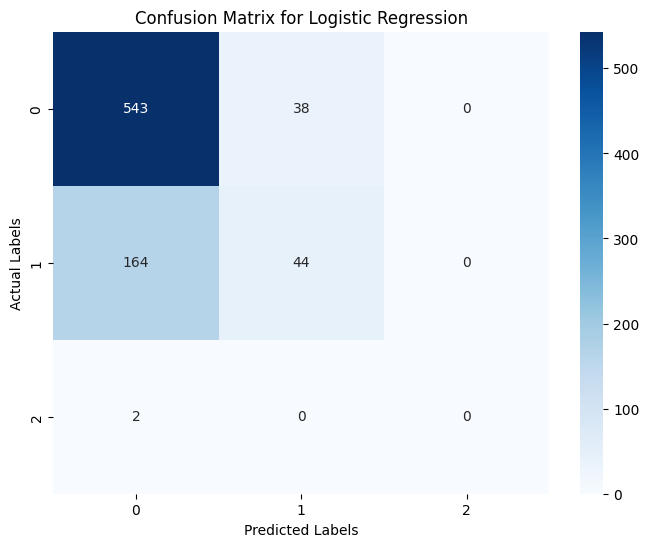

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
file_path = r"C:\Users\akash\Downloads\cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Split data into features and target
X = data.drop("gdp", axis=1)
y = data["gdp"]

# Convert the continuous 'gdp' variable into categorical labels
# Example: Bin 'gdp' into 3 categories: low, medium, high
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the accuracy and other metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_str)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


## Principle Component Analysis

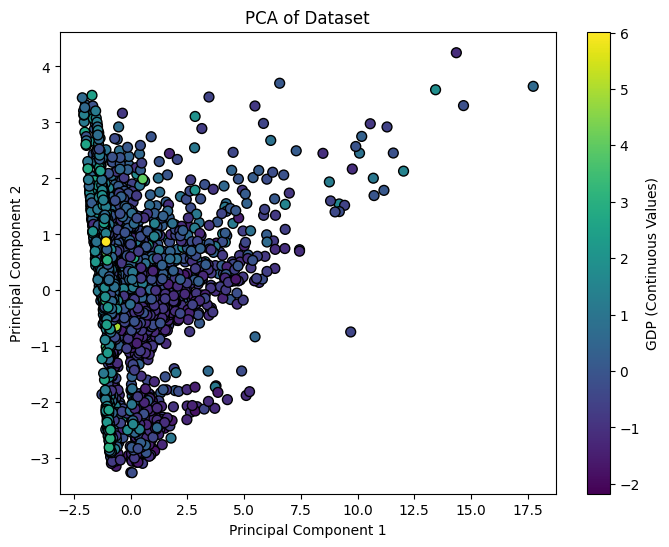

In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
file_path = r"C:\Users\akash\Downloads\cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Split data into features and target
X = data.drop("gdp", axis=1)
y = data["gdp"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Dataset")
plt.colorbar(label="GDP (Continuous Values)")
plt.show()


## Naive Bayes Classification

Accuracy: 0.5891276864728192

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77       581
           1       0.38      0.23      0.29       208
           2       0.01      0.50      0.01         2

    accuracy                           0.59       791
   macro avg       0.40      0.48      0.36       791
weighted avg       0.70      0.59      0.64       791



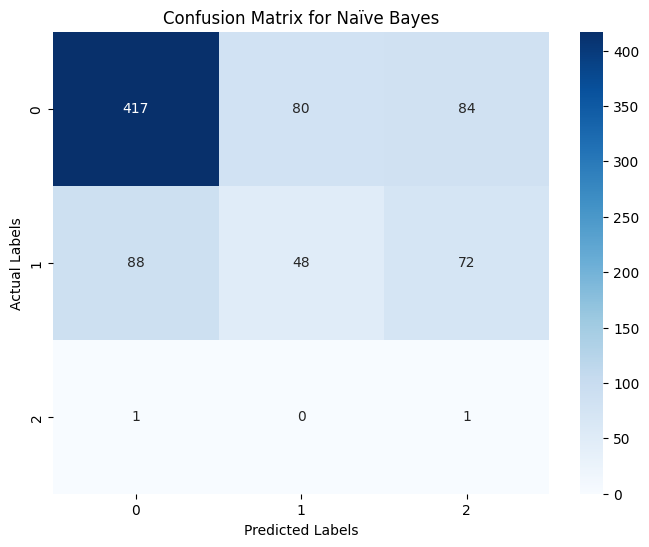

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
file_path = r"C:\Users\akash\Downloads\cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Split data into features and target
X = data.drop("gdp", axis=1)
y = data["gdp"]

# Convert the continuous 'gdp' variable into categorical labels
# Example: Bin 'gdp' into 3 categories: low, medium, high
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Initialize and train the Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the accuracy and other metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_str)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Naïve Bayes")
plt.show()


## Support Vector Machine

Accuracy: 0.8103666245259166

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88       581
           1       0.76      0.41      0.54       208
           2       0.00      0.00      0.00         2

    accuracy                           0.81       791
   macro avg       0.53      0.46      0.47       791
weighted avg       0.80      0.81      0.79       791



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

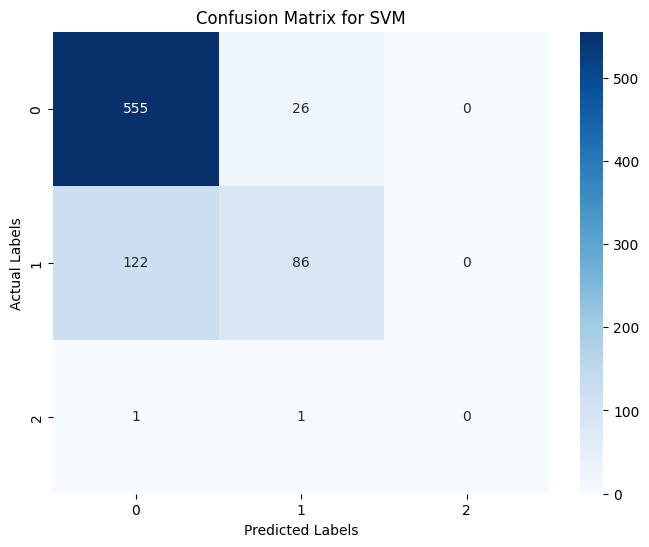

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
file_path = r"C:\Users\akash\Downloads\cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Split data into features and target
X = data.drop("gdp", axis=1)
y = data["gdp"]

# Convert the continuous 'gdp' variable into categorical labels
# Example: Bin 'gdp' into 3 categories: low, medium, high
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the accuracy and other metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_str)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for SVM")
plt.show()


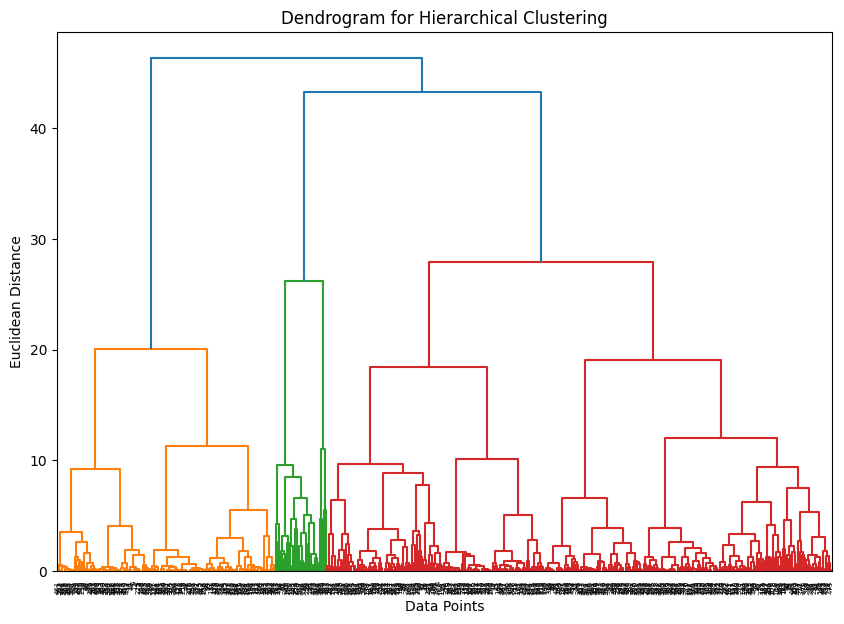

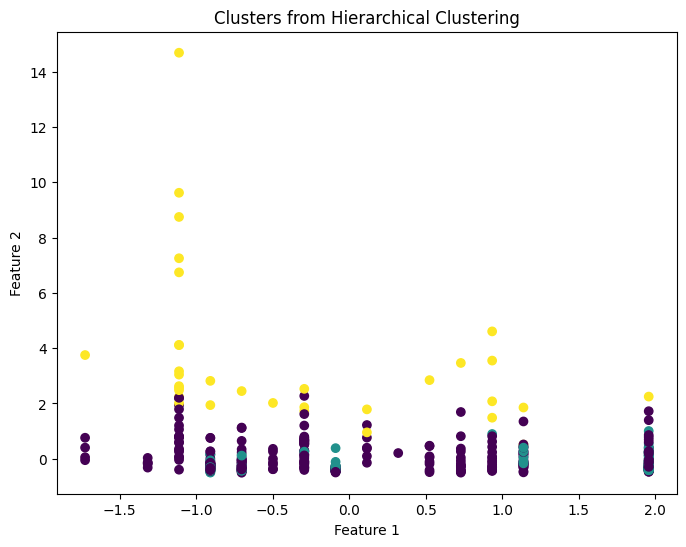

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Load your dataset
file_path = r"C:\Users\akash\Downloads\cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Select a smaller subset of the data for quicker execution (e.g., first 500 rows)
X = data.drop("gdp", axis=1).iloc[:500]  # Adjust the number of rows as needed

# Step 1: Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 2: Perform Agglomerative Hierarchical Clustering
hc_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc_model.fit_predict(X)

# Step 3: Visualize the clusters (use the first two features for plotting)
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_hc, cmap='viridis')
plt.title("Clusters from Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## K-Means Clustering

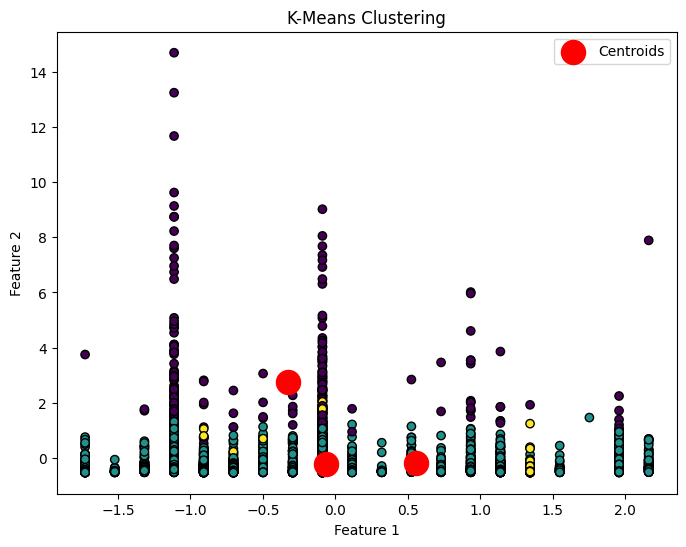

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load your dataset
file_path = r"C:\Users\akash\Downloads\cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Select features for clustering (excluding the target 'gdp')
X = data.drop("gdp", axis=1)

# Step 1: Perform K-Means Clustering
# Specify the number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 2: Visualize the clusters (use the first two features for plotting)
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## Cluster Evaluation

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Load your dataset
file_path = r"C:\Users\akash\Downloads\cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Select features for clustering (excluding the target 'gdp')
X = data.drop("gdp", axis=1)

# Step 1: Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 2: Evaluate Clustering with Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

# Step 3: Evaluate Clustering with Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X, y_kmeans)
print("Calinski-Harabasz Index:", calinski_harabasz)


Silhouette Score: 0.34341666052012243
Calinski-Harabasz Index: 1128.7980297057939


## Decision Tree Algorithm

Accuracy: 0.7534766118836915

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       581
           1       0.53      0.60      0.56       208
           2       0.00      0.00      0.00         2

    accuracy                           0.75       791
   macro avg       0.46      0.47      0.47       791
weighted avg       0.77      0.75      0.76       791



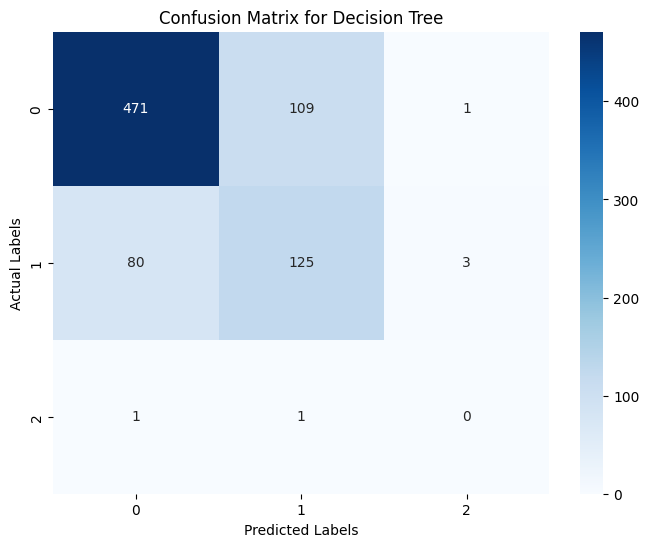

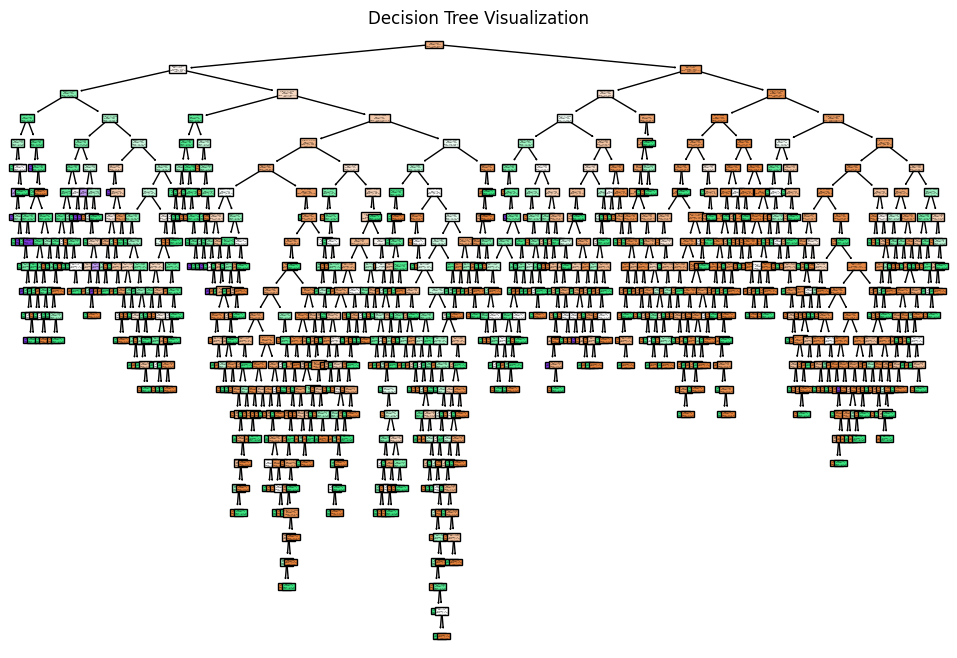

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
file_path = r"C:\Users\akash\Downloads\cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Split data into features and target
X = data.drop("gdp", axis=1)
y = data["gdp"]

# Convert the continuous 'gdp' variable into categorical labels
# Example: Bin 'gdp' into 3 categories: low, medium, high
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the accuracy and other metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_str)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Low", "Medium", "High"])
plt.title("Decision Tree Visualization")
plt.show()


## Random Forest

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy with Best Parameters: 0.8103666245259166

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       581
           1       0.66      0.57      0.61       208
           2       0.00      0.00      0.00         2

    accuracy                           0.81       791
   macro avg       0.51      0.49      0.50       791
weighted avg       0.80      0.81      0.80       791



C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

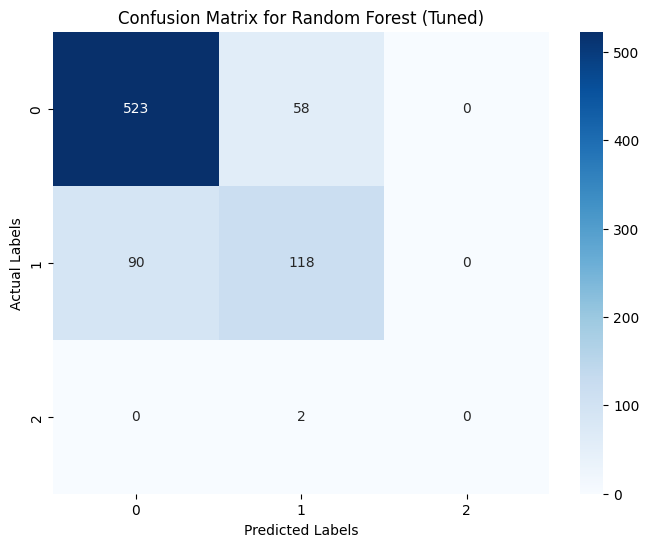

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
file_path = r"C:\Users\akash\Downloads\cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Split data into features and target
X = data.drop("gdp", axis=1)
y = data["gdp"]

# Convert the continuous 'gdp' variable into categorical labels
# Example: Bin 'gdp' into 3 categories: low, medium, high
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at a leaf node
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best parameters and the accuracy
print("Best Parameters:", best_params)
print("Test Accuracy with Best Parameters:", accuracy)
print("\nClassification Report:\n", classification_report_str)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Random Forest (Tuned)")
plt.show()


## Artificial Neural Networks

In [26]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 1/50


C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5362 - loss: 0.9312 - val_accuracy: 0.7409 - val_loss: 0.6181
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.7441 - loss: 0.5848 - val_accuracy: 0.7441 - val_loss: 0.5430
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.7495 - loss: 0.5397 - val_accuracy: 0.7504 - val_loss: 0.5257
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.7735 - loss: 0.5184 - val_accuracy: 0.7472 - val_loss: 0.5206
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.7907 - loss: 0.4813 - val_accuracy: 0.7425 - val_loss: 0.5175
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.7849 - loss: 0.4919 - val_accuracy: 0.7393 - val_loss: 0.5149
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.7822 - loss: 0.4994 - val_accuracy: 0.7441 - val_loss: 0.5106
Epoch 8/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.7752 - loss: 0.4969 - val_accuracy:

C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

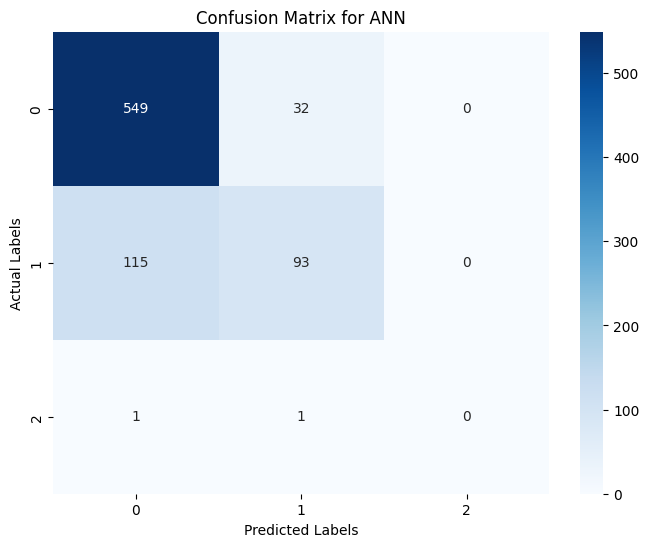

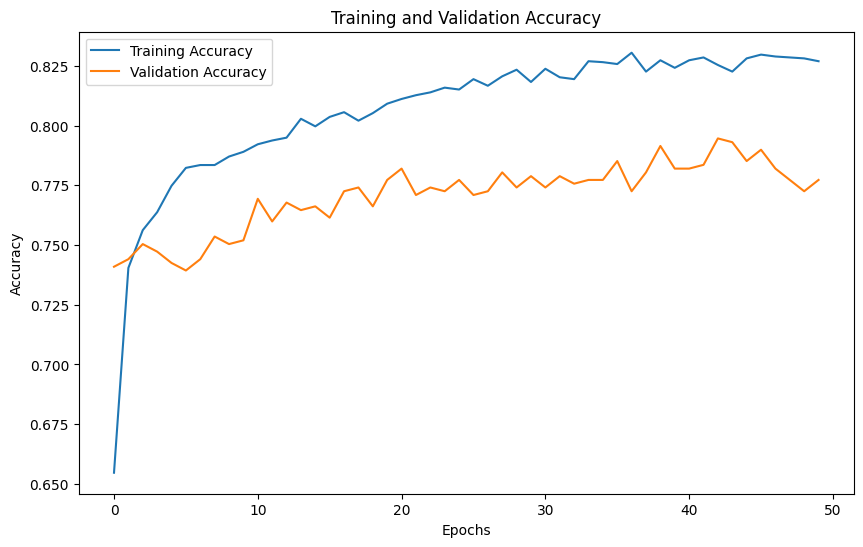

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Load your dataset
file_path = r"C:\Users\akash\Downloads\cleaned_dataset.csv"
data = pd.read_csv(file_path)

# Split data into features and target
X = data.drop("gdp", axis=1)
y = data["gdp"]

# Convert the continuous 'gdp' variable into categorical labels
# Example: Bin 'gdp' into 3 categories: low, medium, high
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Convert the categorical target variable to a numeric type
y_binned = y_binned.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the ANN model
model = Sequential()

# Add layers to the model
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))  # Output layer for 3 categories

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Evaluate the model using a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_report_str = classification_report(y_test, y_pred_classes)

# Print the classification report
print("\nClassification Report:\n", classification_report_str)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for ANN")
plt.show()

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()
